In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cardiovascular-diseases-risk-prediction-dataset/CVD_cleaned.csv


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [20]:
df = pd.read_csv('/kaggle/input/cardiovascular-diseases-risk-prediction-dataset/CVD_cleaned.csv')

In [21]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [22]:
df.shape

(308854, 19)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [24]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in df.columns:
    df[i] = label_encoder.fit_transform(df[i])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype
---  ------                        --------------   -----
 0   General_Health                308854 non-null  int64
 1   Checkup                       308854 non-null  int64
 2   Exercise                      308854 non-null  int64
 3   Heart_Disease                 308854 non-null  int64
 4   Skin_Cancer                   308854 non-null  int64
 5   Other_Cancer                  308854 non-null  int64
 6   Depression                    308854 non-null  int64
 7   Diabetes                      308854 non-null  int64
 8   Arthritis                     308854 non-null  int64
 9   Sex                           308854 non-null  int64
 10  Age_Category                  308854 non-null  int64
 11  Height_(cm)                   308854 non-null  int64
 12  Weight_(kg)                   308854 non-null  int64
 13  BMI           

In [25]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,3,2,0,0,0,0,0,0,1,0,10,36,9,77,1,0,30,16,12
1,4,4,0,1,0,0,0,2,0,0,10,51,145,1226,0,0,30,0,4
2,4,4,1,0,0,0,0,2,0,0,8,49,180,1682,0,4,12,3,16
3,3,4,1,1,0,0,0,2,0,1,11,66,195,1267,0,0,30,30,8
4,2,4,0,0,0,0,0,0,0,1,12,77,180,868,1,0,8,4,0


In [26]:
df['General_Health'].unique()

array([3, 4, 2, 1, 0])

In [27]:
from sklearn import preprocessing

# Assuming you have a valid DataFrame named df

# Preparing attributes of scaled data
X = df.drop('Heart_Disease', axis=1)  # Dropping target and extra columns
y = df['Heart_Disease']

# Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X = s_scaler.fit_transform(X)
X = pd.DataFrame(X, columns=col_names)

# Displaying summary statistics of the scaled features
X_summary = X.describe().T
print(X_summary)

                                 count          mean       std       min  \
General_Health                308854.0  1.406113e-16  1.000002 -1.521497   
Checkup                       308854.0 -5.378752e-17  1.000002 -3.447585   
Exercise                      308854.0  1.001212e-16  1.000002 -1.856251   
Skin_Cancer                   308854.0 -2.503029e-17  1.000002 -0.327962   
Other_Cancer                  308854.0 -1.619607e-17  1.000002 -0.327260   
Depression                    308854.0  5.484578e-17  1.000002 -0.500659   
Diabetes                      308854.0  1.067468e-17  1.000002 -0.425409   
Arthritis                     308854.0  4.269873e-17  1.000002 -0.697442   
Sex                           308854.0 -6.699283e-17  1.000002 -0.963315   
Age_Category                  308854.0  1.155810e-16  1.000002 -1.854931   
Height_(cm)                   308854.0  4.858821e-17  1.000002 -5.372382   
Weight_(kg)                   308854.0  1.509179e-17  1.000002 -2.537626   
BMI         

In [28]:
from sklearn.model_selection import train_test_split
from keras.layers import Dense, BatchNormalization, Dropout
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras import callbacks

In [29]:
from sklearn.model_selection import train_test_split
# Assuming you have valid arrays or DataFrames for X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [30]:
model = Sequential()

model.add(Dense(32, activation = 'relu', kernel_initializer = 'uniform'))
model.add(Dense(32, activation='relu', kernel_initializer = 'uniform'))
model.add(Dense(16, activation='relu', kernel_initializer = 'uniform'))
model.add(Dropout(0.25))
model.add(Dense(8, activation = 'relu', kernel_initializer = 'uniform'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'uniform'))

In [31]:
opt = Adam(learning_rate=0.0009)
model.compile(optimizer=opt, loss = 'binary_crossentropy', metrics=['accuracy'])

In [32]:
history = model.fit(X_train, y_train, batch_size=35, epochs=5, callbacks=callbacks.EarlyStopping(
    min_delta=0.001,
    patience=20,
    restore_best_weights=True
),validation_split=0.2)

Epoch 1/5
4730/4730 [==============================] - 20s 4ms/step - loss: 0.2551 - accuracy: 0.9196 - val_loss: 0.2347 - val_accuracy: 0.9187
Epoch 2/5
4730/4730 [==============================] - 19s 4ms/step - loss: 0.2377 - accuracy: 0.9196 - val_loss: 0.2362 - val_accuracy: 0.9187
Epoch 3/5
4730/4730 [==============================] - 19s 4ms/step - loss: 0.2369 - accuracy: 0.9196 - val_loss: 0.2359 - val_accuracy: 0.9187
Epoch 4/5
4730/4730 [==============================] - 18s 4ms/step - loss: 0.2361 - accuracy: 0.9196 - val_loss: 0.2387 - val_accuracy: 0.9187
Epoch 5/5
4730/4730 [==============================] - 19s 4ms/step - loss: 0.2365 - accuracy: 0.9196 - val_loss: 0.2345 - val_accuracy: 0.9187


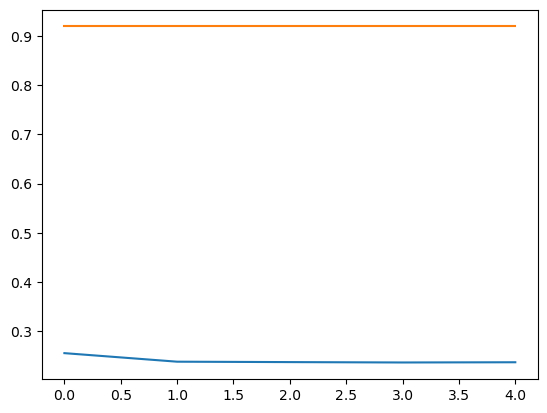

In [33]:
plt.plot(history.history['loss'],)
plt.plot(history.history['accuracy'])